In [1]:
import numpy as np
import matplotlib.pyplot as plt





The physical parameters are:

- Gravitational acceleration: $g = 10 \, \text{m/s}^2$
- Quadratic drag coefficient: $B_2/m = 10^{-5}$ (when drag is enabled)
- Initial speed: $v_0 = 100 \, \text{m/s}$  

The initial state vector is defined as:

$$
\mathbf{s}(0) = [x_0, y_0, v_{x0}, v_{y0}]
= [0, 0, v_0\cos\theta, v_0\sin\theta]
$$

which corresponds to launching the projectile from the origin.
  

The speed magnitude is computed as:

$$
v = \sqrt{v_x^2 + v_y^2}
$$

The equations of motion with quadratic air resistance are:

\begin{align}
\frac{dx}{dt} &= v_x \\
\frac{dy}{dt} &= v_y \\
\frac{dv_x}{dt} &= -\frac{B_2}{m} v v_x \\
\frac{dv_y}{dt} &= -g - \frac{B_2}{m} v v_y
\end{align}

These equations describe how drag opposes motion while gravity pulls the projectile downward.

A `while` loop is used to integrate the equations of motion forward in time using Euler’s method.  

At each time step:
1. The current state is stored in `traj`
2. The state is updated
3. The loop stops when $y \le 0$, which corresponds to the projectile hitting the ground.





Three launch angles are chosen: $30^\circ$, $45^\circ$, and $60^\circ$.  

These are converted to radians using:


angles = [np.deg2rad(a) for a in angles]


---

## **Cell — Plotting Trajectories (With and Without Drag)**

 

For each launch angle, the motion is simulated twice:
- once **with air resistance**
- once **without air resistance**

Dashed lines represent motion with drag, while solid lines represent ideal motion without drag.  

This allows direct visual comparison of how air resistance affects the trajectory.


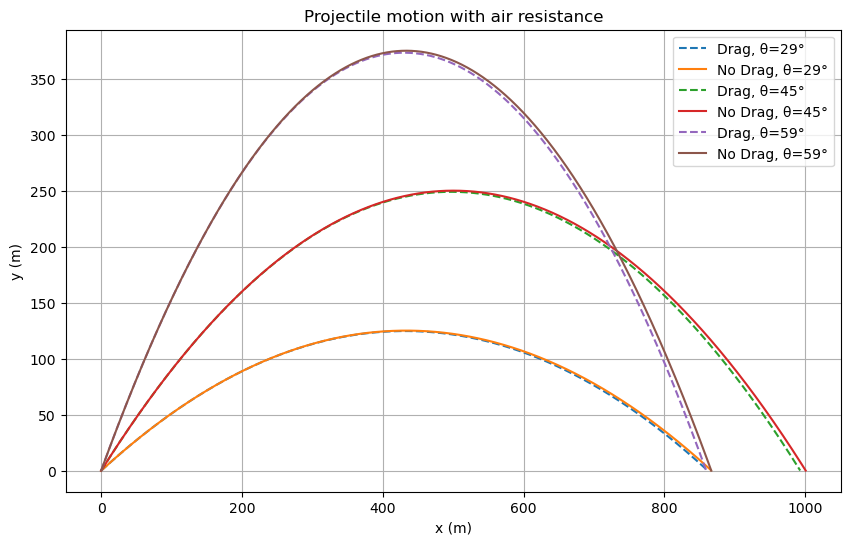

In [24]:
v0 = 100
g = 10
B2m = 1e-5
dt = 0.01

angles = [30, 45, 60]
angles = [np.deg2rad(a) for a in angles]

plt.figure(figsize=(10,6))

for theta in angles:

    state = np.array([
        0,
        0,
        v0 * np.cos(theta),
        v0 * np.sin(theta)
    ])

    traj = []

    while state[1] >= 0:
        traj.append(state.copy())

        x, y, vx, vy = state
        v = np.sqrt(vx**2 + vy**2)

        state[0] = x + dt * vx
        state[1] = y + dt * vy
        state[2] = vx - B2m * v * vx * dt
        state[3] = vy - dt * g - B2m * v * vy * dt
    traj=np.array(traj)
    plt.plot(traj[:,0], traj[:,1], '--',label=f"Drag, θ={int(np.rad2deg(theta))}°")
    # ---------- WITHOUT DRAG ---------
    state = np.array([
        0,
        0,
        v0 * np.cos(theta),
        v0 * np.sin(theta)
    ])

    traj = []
    while state[1] >= 0:
        traj.append(state.copy())

        x, y, vx, vy = state
        v = np.sqrt(vx**2 + vy**2)

        state[0] = x + dt * vx
        state[1] = y + dt * vy
        state[2] = vx 
        state[3] = vy - dt * g  
    traj=np.array(traj)
    plt.plot(traj[:,0], traj[:,1], '-',label=f"No Drag, θ={int(np.rad2deg(theta))}°")

plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Projectile motion with air resistance")
plt.legend()
plt.grid()
plt.show()


## Results

The simulated trajectories show the following key features:

- In the absence of air resistance, all trajectories follow symmetric parabolic paths, as predicted by classical projectile motion theory.
- With air resistance included, the trajectories become asymmetric, with a steeper descent and reduced horizontal range.
- The maximum height and range are both smaller when drag is present.
- Among the tested angles, $45^\circ$ gives the maximum range in the ideal (no-drag) case.
- With drag, the optimal angle shifts slightly below $45^\circ$.
- The differences between the drag and no-drag cases are relatively small because the chosen drag coefficient $B_2/m = 10^{-5}$ corresponds to weak air resistance.


## Conclusion

This simulation successfully demonstrates the effect of air resistance on projectile motion using Euler’s numerical method.

The presence of quadratic drag introduces energy dissipation, which leads to:
- Shorter horizontal range  
- Lower maximum height  
- Asymmetric trajectories  

The numerical results are consistent with physical expectations.

Since the chosen drag coefficient is small compared to gravitational acceleration, the trajectories with and without drag appear very similar. If a larger value of $B_2/m$ were used, the effect of air resistance would become much more pronounced.

Overall, Euler’s method provides a simple and effective approach for modeling projectile motion with and without air resistance.
